In [ ]:
import requests, zipfile, io

zip_file_url = 'https://moncoachdata.com/wp-content/uploads/cell_images.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
import os

In [ ]:
data_dir = 'cell_images'

In [ ]:
os.listdir(data_dir)

['test', 'train']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.image import  imread

In [ ]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path + 'parasitized')[0]

'C68P29N_ThinF_IMG_20150819_134112_cell_108.png'

In [ ]:
para_cell = train_path + 'parasitized' + '/C59P20thinF_IMG_20150803_112733_cell_167.png'

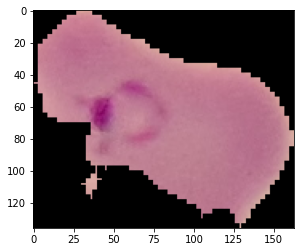

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
os.listdir(train_path + 'uninfected')[0]

'C228ThinF_IMG_20151112_142900_cell_202.png'

In [ ]:
uninfected_cell = train_path + '/uninfected' + '/C91P52ThinF_IMG_20150821_123116_cell_12.png'

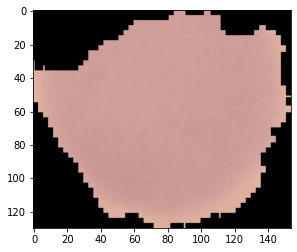

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
len(os.listdir(train_path + 'parasitized'))

12480

In [ ]:
len(os.listdir(train_path + 'uninfected'))

12480

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
  img = imread(test_path + 'uninfected' + '/' + image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


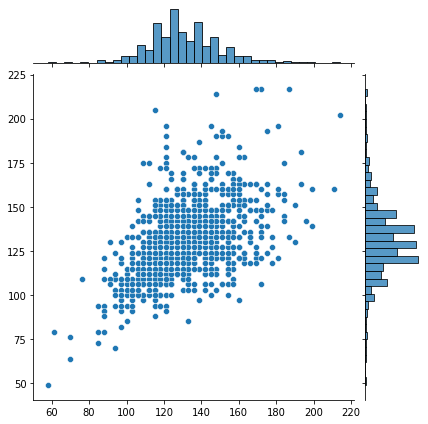

In [ ]:
sns.jointplot(dim1, dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
image_shape = (130, 130, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
para_img = imread(para_cell)

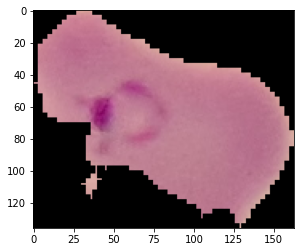

In [ ]:
plt.imshow(para_img)

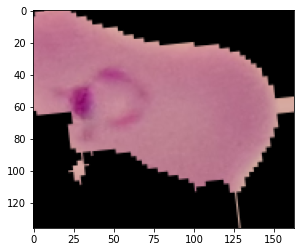

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
help(ImageDataGenerator)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size =16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 123s 79ms/step - loss: 0.6879 - accuracy: 0.6084 - val_loss: 0.6471 - val_accuracy: 0.6523
Epoch 2/20
1560/1560 [==============================] - 122s 78ms/step - loss: 0.3445 - accuracy: 0.8597 - val_loss: 0.1936 - val_accuracy: 0.9269
Epoch 3/20
1560/1560 [==============================] - 122s 78ms/step - loss: 0.1933 - accuracy: 0.9374 - val_loss: 0.1986 - val_accuracy: 0.9281
Epoch 4/20
1560/1560 [==============================] - 121s 78ms/step - loss: 0.1897 - accuracy: 0.9370 - val_loss: 0.2018 - val_accuracy: 0.9365


In [ ]:
metrics = pd.DataFrame(model.history.history)

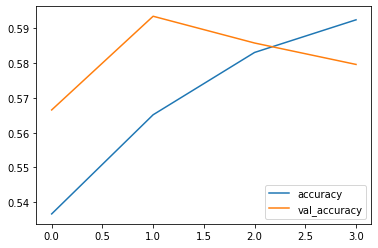

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
predictions = model.predict(test_image_gen) > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.59      0.51      0.55      1300
           1       0.57      0.64      0.60      1300

    accuracy                           0.58      2600
   macro avg       0.58      0.58      0.57      2600
weighted avg       0.58      0.58      0.57      2600

